In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data=pd.read_excel('Airlines.xlsx',sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [52]:
data.info()
#no null value present in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [53]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
#col=['Balance','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']
for i in data.iloc[:,1:]:
    data[i]=scalar.fit_transform(data[[i]])

In [54]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


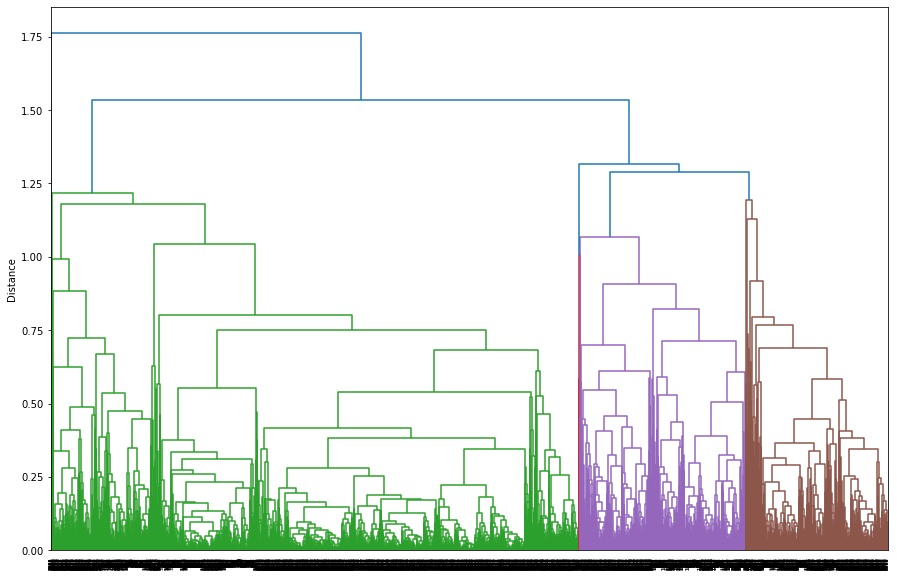

In [24]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(data.iloc[:,1:], method="weighted",metric="euclidean")
plt.figure(figsize=(15,10))
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()
#tried different method like complete,average..etc but got very complex dendogram compare to weighted method.
#if we cut dendogram from 1.25 then we can form 3 clusters.

In [55]:
from sklearn.cluster import AgglomerativeClustering
h=AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean').fit(data.iloc[:,1:])
data['clust']=h.labels_
data['clust'].value_counts()
#Tried different linkage methods like complete,average etc but using ward method got 3 clusters having values counts considerable

1    1710
0    1481
2     808
Name: clust, dtype: int64

In [66]:
data.iloc[:,1:12].groupby(data.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,0.056928,0.021546,0.415429,0.007765,0.004558,0.109621,0.183518,0.027826,0.049049,0.557398,1.0
1,0.022217,0.004736,0.000000,0.009942,0.000146,0.009703,0.066639,0.007766,0.013152,0.429271,0.0
2,0.062306,0.014466,0.549505,0.000619,0.006498,0.100340,0.190277,0.006449,0.010531,0.526314,0.0


# Kmean Clustering

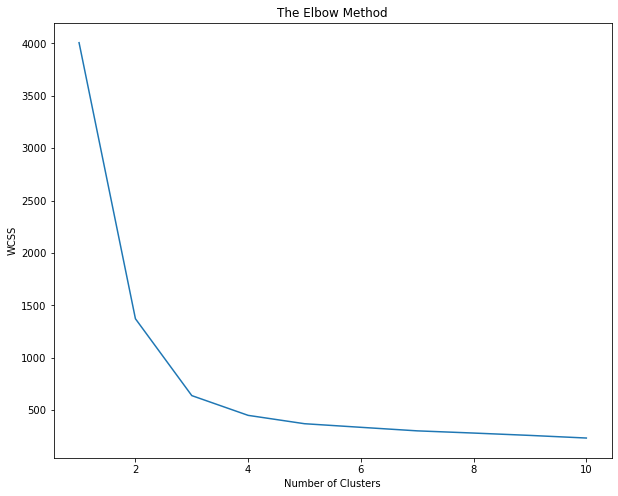

In [59]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(data.iloc[:,1:])
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()
#After 5 there is minimal amount of slope.So from this curve we can consider that we should form 5 cluster.

In [60]:
clf=KMeans(n_clusters=5)
y_means=clf.fit_predict(data.iloc[:,1:])

In [62]:
data['Clusters']=y_means
data['Clusters'].value_counts()
#optimal number of clusters and as well as having good amount of points in each cluster

0    954
1    808
3    808
4    756
2    673
Name: Clusters, dtype: int64

In [64]:
data.iloc[:,1:12].groupby(data.Clusters).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters,,,,,,,,,,,
0,0.018398,0.006403,0.000000,0.008910,0.000000,0.009538,0.064404,0.007255,0.011946,0.237150,0.0
1,0.063535,0.017791,0.728960,0.000619,0.006498,0.172970,0.234904,0.023160,0.040421,0.586139,1.0
2,0.048995,0.026054,0.039004,0.016345,0.002229,0.033564,0.121825,0.033427,0.059407,0.522892,1.0
3,0.062306,0.014466,0.549505,0.000619,0.006498,0.100340,0.190277,0.006449,0.010531,0.526314,0.0
4,0.027037,0.002632,0.000000,0.011243,0.000331,0.009911,0.069460,0.008410,0.014675,0.671710,0.0


In [ ]:
#If we again analyze the Hclustering result then there is only one cluster having Award average value 1 
#But Using Kmean Clustering we found 2 cluster having award average value is 1